# Sevenbox

# Code definitions

## Sevenbox model
Definition of the actual model code. The function is called later! 

In [1]:
sevenbox <-function(flag='S',            # Set flag=S,M,N,D to perturb resp. the south, middle lat, north, deep box
                    perturbation=0,      # Set perturbations
                    N=1000,              # Set simulation length in years
                    cpo=4200,            # Set spec. heat capacity of water
                    Ks=1.85e+13,         # Set sensible heat flux
                    Kl=3.37e+18,         # Set latent heat flux
                    CFnl=1,
                    CFml=1,              # Set parameter that controls solar CO2 effect (resp. on north, middle lat, south box) 
                    CFsl=1, 
                    F3=0,                # Set additional freshwater fluxes
                    F4=0,                # F3 south, F4 north
                    Initial=new('list')  # Use custom initial conditions
                   )
    { 

      #Use default Initial conditions, if not specified!
      if (!is.null(Initial$Tasl))
        Tasl0_i = Initial$Tasl
      else
        Tasl0_i = 3.0E+00

      if (!is.null(Initial$Taml))
        Taml0_i = Initial$Taml
      else
        Taml0_i = 2.330247873220102E+01

      if (!is.null(Initial$Tanl))
        Tanl0_i = Initial$Tanl
      else
        Tanl0_i = 1.097211710486884E+00

      if (!is.null(Initial$Tsl))
        Tsl0_i = Initial$Tsl
      else
        Tsl0_i = 4.710827447339700E+00

      if (!is.null(Initial$Tml))
        Tml0_i = Initial$Tml
      else
        Tml0_i = 2.451494985098850E+01

      if (!is.null(Initial$Tnl))
        Tnl0_i = Initial$Tnl
      else
        Tnl0_i = 2.407179048675894E+00

      if (!is.null(Initial$Td))
        Td0_i = Initial$Td
      else
        Td0_i = 2.407179048697646E+00

      if (!is.null(Initial$Ssl))
        Ssl0_i = Initial$Ssl
      else
        Ssl0_i = 3.472600421637184E+01

      if (!is.null(Initial$Sml))
        Sml0_i = Initial$Sml
      else
        Sml0_i = 3.526105141164437E+01

      if (!is.null(Initial$Snl))
        Snl0_i = Initial$Snl
      else
        Snl0_i = 3.491021002118518E+01

      if (!is.null(Initial$Sd))
        Sd0_i = Initial$Sd
      else
        Sd0_i = 3.491021002102826E+01


    ## Define perturbation in PSU
    N_pert = length(perturbation);

    dt = 1.0 / 100.; # for time stepping
    jend = N/dt;

    iprint = 1/dt; #printout once a year

    rho0 = 1025.0; #Density of saltwater
    #cpo = 4200.0; #Specific heat capacity of water <- given as argument

    alphha = 1.5E-4; #thermal and
    beta = 8.0E-4; #haline expansion coefficent at 15 degree Celsius

    Sref = 34.9; #reference Salinity
    cpa = 1004.0; #Specific heat cap. of dry air

    A = 213.35; #(Chen et al. 1995)
    B = 2.22;

    Lv = 2.5E6; #Latent heat of vaporisation
    rhow = 1000.0; #Density of freshwater
    r = 6.371E6; #The Earth's radius

    Degree = pi / 180.0;

    alpn = 0.42;
    alpm = 0.25; #mean albedo
    alps = 0.40;

    rh = 0.8; #mean relative humidity

    sigma=0.001;
    sigma=0.
    #------------------------------------------------------------------------------
    #Set ocean and atmosphere values
    #coupling between the ocean and the atmosphere EBM
    #----------------------------------------------------------------------------
    Q1nl = 20.;
    Q1ml = 70.;
    Q1sl = 20.;#tuning parameters for surface heat fluxes
    Q2nl = 50.;
    Q2ml = 50.;
    Q2sl = 50.;

    dz1 = 600.0; #depth of tropical box
    dz2 = 4000.0; #depth of ocean

    c = 1.5264e10 * 1.0; #tuning parameter for overturning

    betaml = 5300.;
    betanl = 5300.; #thermal inertia
    betasl = 5300.;

    #Ks = 1.e13 * 2.5; #tuning parameter for sensible heat fluxes  <- given as argument
    #Kl = 5.10e17 * 1.5; #tuning parameter for latent heat fluxes  <- given as argument

    Qsolarnl = 265.0 + 5.;
    Qsolarml = 390. + 0.; #incoming solar radiation constants
    Qsolarsl = 310. - 0.;

    #CFnl = 1.0;
    #CFml = 1.0; #Takes acount for the solar CO2 effect  <- given as arguments
    #CFsl = 1.0;

    frf1 = 0.21069;
    frf2 = 80. / 360.; #Fraction of the total hemispheric surface
    frf3 = 0.16267;

    #F3 = 0.0e6; #additional freshwater fluxes  <- given as arguments
    #F4 = 0.0e6;

    #------------------------------------------------------------------------------
    #GEOMETRY
    #------------------------------------------------------------------------------

    cos30 = cos(30*Degree);
    cos45 = cos(45*Degree);

    sin30 = sin(30*Degree);
    sin45 = sin(45*Degree);
    sin60 = sin(60*Degree);
    sin70 = sin(70*Degree);
    sin80 = sin(80*Degree);

    #----------------
    #AREA Atmosphere  A = 2 * pi * r * h & h = r - sin(alpha) * r
    #----------------

    AAS = 2 * pi * r^2 * (1-sin30);
    AAM = 2 * pi * r^2 * (sin30+sin45);
    AAN = 2 * pi * r^2 * (1-sin45);
    AAG = AAS + AAM + AAN;

    #AAG = 4 * pi * r**2

    #----------------
    #AREA Ocean
    #----------------

    AOS = 2 * pi * r^2 * (sin60-sin30) * 80. / 360.;
    AOM = 2 * pi * r^2 * (sin30+sin45) * 80. / 360.;
    AON = 2 * pi * r^2 * (sin80-sin45) * 80. / 360.;

    #----------------
    #Volume Ocean
    #----------------

    Vsl = AOS * 4000.;
    Vml = AOM * 600.;
    Vnl = AON * 4000.;
    Vd = AOM * 3400.;

    Out=list(time=array(NA, dim=N),
             Tglob=array(NA, dim=c(N, N_pert)),
             Tasl=array(NA, dim=c(N, N_pert)),
             Taml=array(NA, dim=c(N, N_pert)),
             Tanl=array(NA, dim=c(N, N_pert)),

             Tsl=array(NA, dim=c(N, N_pert)),
             Tml=array(NA, dim=c(N, N_pert)),
             Tnl=array(NA, dim=c(N, N_pert)),
             Td=array(NA, dim=c(N, N_pert)),

             Ssl=array(NA, dim=c(N, N_pert)),
             Sml=array(NA, dim=c(N, N_pert)),
             Snl=array(NA, dim=c(N, N_pert)),
             Sd=array(NA, dim=c(N, N_pert)),

             Fs30S=array(NA, dim=c(N, N_pert)),
             Fs50N=array(NA, dim=c(N, N_pert)),
             Fl30S=array(NA, dim=c(N, N_pert)),
             Fl50N=array(NA, dim=c(N, N_pert)),

             FWFAS=array(NA, dim=c(N, N_pert)),
             FWFAM=array(NA, dim=c(N, N_pert)),
             FWFAN=array(NA, dim=c(N, N_pert)),

             Hfnl=array(NA, dim=c(N, N_pert)),
             Hfml=array(NA, dim=c(N, N_pert)),
             Hfsl=array(NA, dim=c(N, N_pert)),

             phi=array(NA, dim=c(N, N_pert)))

    for (j in 1:N_pert){

        if (flag == 'S')  {
          Ssl0=Ssl0_i + perturbation[j]; 
          }
        else if (flag == 'M') { 
          Sml0=Sml0_i + perturbation[j]; 
          }
        else if (flag == 'N') { 
          Snl0=Snl0_i + perturbation[j]; 
          }
        else if (flag == 'D') { 
          Sd0=Sd0_i + perturbation[j]; 
          }


        #------------------------------------------------------------------------------
        #Set initial values (if not given as input)
        #------------------------------------------------------------------------------

        if (!exists('Tasl0')) Tasl0 = Tasl0_i
        if (!exists('Taml0')) Taml0 = Taml0_i
        if (!exists('Tanl0')) Tanl0 = Tanl0_i

        if (!exists('Tsl0')) Tsl0 = Tsl0_i
        if (!exists('Tml0')) Tml0 = Tml0_i
        if (!exists('Tnl0')) Tnl0 = Tnl0_i
        if (!exists('Td0')) Td0 = Td0_i

        if (!exists('Ssl0')) Ssl0 = Ssl0_i
        if (!exists('Sml0')) Sml0 = Sml0_i
        if (!exists('Snl0')) Snl0 = Snl0_i
        if (!exists('Sd0'))  Sd0  = Sd0_i


        #------------------------------------------------------------------------------
        #Calculate new parameters
        #------------------------------------------------------------------------------

        rcz1 = rho0 * cpo * dz1; ###
        rcz2 = rho0 * cpo * dz2;
        LR = 1. / (Lv*rhow);
        zeit = 365.25 * 24.0 * 60.0 * 60.0 ;# in s/year


        Tnl = Tnl0;
        Tml = Tml0;
        Tsl = Tsl0;
        Td = Td0;

        Snl = Snl0;
        Sml = Sml0;
        Ssl = Ssl0;
        Sd = Sd0;

        Tanl = Tanl0;
        Taml = Taml0;
        Tasl = Tasl0;

        dts = dt * zeit;
        sqrtdts=sqrt(dts);
        time = 0.0; # save initial conditions

        K = 1;

        #------------------------------------------------------------------------------
        # Time loop

        for (i in 1:jend){

            #------------------------------------------------------------------------------
            # Calculate temperatures at box boundaries
            #------------------------------------------------------------------------------

            T30 = Tasl + (45.*Degree-30.0*Degree) * ((Taml-Tasl)/(48.*Degree));

            T45 = Tanl + (62.*Degree-45.0*Degree) * ((Taml-Tanl)/(42.*Degree));


            #------------------------------------------------------------------------------
            # Calculate atmospheric sensible heat transports
            #------------------------------------------------------------------------------

            FSN = Ks * (Taml-Tanl)/(r*(62.*Degree-20.0*Degree));
            FSS = Ks * (Taml-Tasl)/(r*(60.0*Degree-20.0*Degree));


            Fs30S = FSS * 2 * pi * r * cos30;
            Fs50N = FSN * 2 * pi * r * cos45;

            #------------------------------------------------------------------------------
            # Calculate atmospheric latent heat transports
            #------------------------------------------------------------------------------

            DQSDT_T30 = 43.5 * 17.67 * 6.112 * exp(17.67 * T30 / (T30+243.5)) / (T30+243.5)^2 * 0.622 / 1000.0;
            DQSDT_T45 = 43.5 * 17.67 * 6.112 * exp(17.67 * T45 / (T45+243.5)) / (T45+243.5)^2 * 0.622 / 1000.0;

            FLS = (Kl*rh*DQSDT_T30/(Taml-Tasl)) * FSS / Ks;
            FLN = (Kl*rh*DQSDT_T45/(Taml-Tanl)) * FSN / Ks;


            Fl30S = FLS * 2 * pi * r * cos30;
            Fl50N = FLN * 2 * pi * r * cos45;

            #------------------------------------------------------------------------------
            # Combined atmospheric heat transports
            #------------------------------------------------------------------------------

            FTS = FSS + FLS;
            FTN = FSN + FLN;


            #------------------------------------------------------------------------------
            # Calculate ocean-atmosphere freshwater fluxes
            #------------------------------------------------------------------------------

            FWFAS = (LR*2*pi*r*cos30*FLS) * (80./360.);#divided through box area equals P-E

            FWFAN = ((LR*2*pi*r*cos45*FLN)*(80./360.)) * 2.5; #times 2.5 due to the large caption area in North Atlantic

            FWFAM = FWFAS + FWFAN;


            #-------------------------------------------------------------------
            #DIAGNOSIS
            #------------------------------------------------------------------
            #----------------
            #Freshwater fluxes in the atmosphere
            #----------------

            #FWFN = PEN * zeit * (100.);
            #FWFS = PES * zeit * (100.);

            #----------------
            #Heat fluxes
            #----------------

            F30S = Fs30S + Fl30S;
            F50N = Fs50N + Fl50N;


            #--------------------------------------------------------------------
            #GLOBAL ATMOSPHERE TEMPERATURE
            #--------------------------------------------------------------------

            Tglob = (0.5*Tasl+1.207*Taml+0.293*Tanl) / 2.;


            #--------------------------------------------------------------------
            #surface heat fluxes
            #--------------------------------------------------------------------

            Hfnl = (Q1nl-(Q2nl*(Tnl-Tanl)));

            Hfml = (Q1ml-(Q2ml*(Tml-Taml)));

            Hfsl = (Q1sl-(Q2sl*(Tsl-Tasl)));

            #--------------------------------------------------------------------
            #Set minimum temperature for ocean (freezing temperature)
            #--------------------------------------------------------------------

            if (Tnl < -1.8) Tnl = - 1.8;
            if (Tsl < -1.8) Tsl = - 1.8;        

            #------------------------------------------------------------------------------
            # Calculate overturning flow
            #-----------------------------------------------------------------------------

            phi = c * (-alphha*(Tnl-Tsl)+beta*(Snl-Ssl));
            #-----------------------------------------------------------------------------

            phii= phi;

            if(phi > 0.){

              #------------------------------------------------------------------------------
              # Euler forward for ocean temperature
              #-----------------------------------------------------------------------------

              Tnln = Tnl + dts * ((Hfnl)/(rcz2)-(Tnl-Tml)*phi/Vnl);


              Tmln = Tml + dts * ((Hfml)/(rcz1)-(Tml-Tsl)*phi/Vml);


              Tsln = Tsl + dts * ((Hfsl)/(rcz2)-(Tsl-Td)*phi/Vsl);

              Tdn = Td + dts * (-(Td-Tnl)*(phi/Vd));


              #-------------------------------------------------------------------------------
              # Euler forward for Salinity
              #-------------------------------------------------------------------------------

              Snln = Snl + dts * (-(Snl-Sml)*phi/(Vnl)-Sref*(FWFAN/Vnl)-Sref*F4/Vnl);

              Smln = Sml + dts * (-(Sml-Ssl)*phi/Vml+Sref*FWFAM/Vml);

              Ssln = Ssl + dts * (-(Ssl-Sd)*phi/Vsl-Sref*(FWFAS/Vsl)-Sref*F3/Vnl);

              Sdn = Sd + dts * (-(Sd-Snl)*(phi/Vd));

            }
            else {

              phi = -phi;

              #------------------------------------------------------------------------------
              # Euler forward for ocean temperature
              #-----------------------------------------------------------------------------

              Tnln = Tnl + dts * ((Hfnl)/(rcz2)-(Tnl-Td)*phi/Vnl);


              Tmln = Tml + dts * ((Hfml)/(rcz1)-(Tml-Tnl)*phi/Vml);


              Tsln = Tsl + dts * ((Hfsl)/(rcz2)-(Tsl-Tml)*phi/Vsl);

              Tdn = Td + dts * (-(Td-Tsl)*(phi/Vd));


              #-------------------------------------------------------------------------------
              # Euler forward for Salinity
              #-------------------------------------------------------------------------------

              Snln = Snl + dts * (-(Snl-Sd)*phi/(Vnl)-Sref*(FWFAN/Vnl)-Sref*F4/Vnl);

              Smln = Sml + dts * (-(Sml-Snl)*phi/Vml+Sref*FWFAM/Vml);

              Ssln = Ssl + dts * (-(Ssl-Sml)*phi/Vsl-Sref*(FWFAS/Vsl)-Sref*F3/Vnl);

              Sdn = Sd + dts * (-(Sd-Ssl)*(phi/Vd));

            }


            #-------------------------------------------------------------------------------
            # Euler forward for atmosphere temperature
            #-------------------------------------------------------------------------------

            Tanln = Tanl + dts * (((cos45/(r*(sin(90.0*Degree)- sin(45*Degree))))*(FSN+FLN)+(Qsolarnl*(1.-alpn)-CFnl*(A+B*Tanl))+(frf1*(-(Q1nl-Q2nl*(Tnl-Tanl)))))/(cpa*betanl))   + sigma*rnorm(1)*sqrtdts;

            Tamln = Taml + dts * ((-(1./(r*(sin(30.0*Degree)+ sin(45*Degree))))*(cos30*FTS+cos45*FTN)+(Qsolarml*(1.-alpm)- CFml*(A+B*Taml))+(frf2*(-(Q1ml-Q2ml*(Tml-Taml)))))/(cpa*betaml))  + sigma*rnorm(1)*sqrtdts;

            Tasln = Tasl + dts * (((cos30/(r*(sin(90.0*Degree)- sin(30*Degree))))*(FSS+FLS)+(Qsolarsl*(1.-alps)-CFsl*(A+B*Tasl))+ (frf3*(-(Q1sl-Q2sl*(Tsl-Tasl)))))/(cpa*betasl))  + sigma*rnorm(1)*sqrtdts;


            #---------------------------------------------------------------------------
            #-----------------------------------------------------------------------

            #----------------------------------------------------------------------
            # Prepare a new timestep
            #-----------------------------------------------------------------------

            Tnl = Tnln;
            Tml = Tmln;
            Tsl = Tsln;
            Td = Tdn;
            Snl = Snln;
            Sml = Smln;
            Ssl = Ssln;
            Sd = Sdn;
            Tanl = Tanln;
            Taml = Tamln;
            Tasl = Tasln;

            time =   i * dt; ###

            #--------------------------------------------------------------------------
            #set output variables
            #--------------------------------------------------------------------------

            if ((i-1) %% 100 == 0){
              if(j==1){
                Out$time[K] = time;
              }

                Out$Tglob[K,j] = Tglob;
                Out$Tasl[K,j] = Tasl;
                Out$Taml[K,j] = Taml;
                Out$Tanl[K,j] = Tanl;

                Out$Tsl[K,j] = Tsl;
                Out$Tml[K,j] = Tml;
                Out$Tnl[K,j] = Tnl;
                Out$Td[K,j] = Td;

                Out$Ssl[K,j] = Ssl;
                Out$Sml[K,j] = Sml;
                Out$Snl[K,j] = Snl;
                Out$Sd[K,j] = Sd;

                Out$Fs30S[K,j] = Fs30S * 1E-15
                Out$Fs50N[K,j] = Fs50N * 1E-15
                Out$Fl30S[K,j] = Fl30S * 1E-15
                Out$Fl50N[K,j] = Fl50N * 1E-15

                Out$FWFAS[K,j] = FWFAS * 1E-6
                Out$FWFAM[K,j] = -FWFAM * 1E-6
                Out$FWFAN[K,j] = FWFAN * 1E-6

                Out$Hfnl[K,j] = Hfnl
                Out$Hfml[K,j] = Hfml
                Out$Hfsl[K,j] = Hfsl

                Out$phi[K,j] = phii * 1E-6

                K = K +1;

                }

            if((i-1)%%(N_pert*jend/100) == 0){

              progress = ((j-1)*jend + i)/ (N_pert * jend)

              #Show progress
              cat("\r Progress: Perturbation ", j, " of ", N_pert, ": ", format(progress * 100, digits=1), "%", sep="")

            }

        }# end of time loop

    } # end pertubation loop

    return(Out) #return results

} #end function

## Plot functions
These functions are used later to visualize the results.

In [58]:
## Plots

plot_box_results<-function(x ,y, xlab="", ylab="", main="", col, yRange=range(y, na.rm=TRUE)){
  
  N_pert = dim(y)[2]
  
  if (missing(col)){
    col = array("black", N_pert)
  }
  
  for (i in 1:N_pert){
    plot(x=x,
         y=y[,i], 
         col=col[i], 
         type='l', 
         xlim=c(0, round(max(x, na.rm=TRUE)+0.5)), 
         ylim=yRange, 
         xlab="", 
         ylab="", 
         main="", 
         xaxs="i",
         lwd=3)
    par(new=TRUE)
  }
  
  title(xlab=xlab, line=2)
  title(ylab=ylab, line=2)
  title(main=main)
  
}


addLegend <- function(pert, col, pos=c(0,1/3,0,1/3), lwd=3, title="Perturbation [PSU]"){
  if(length(pert) > 0){
    par(new=TRUE)
    par("fig"=pos)
    plot(1, type="n", axes=FALSE, xlab="", ylab="")
    par(new=TRUE)
    par("xpd"=NA)
    legend("topleft","(x,y)",legend=pert, col=col, lwd=lwd)
  }
}

plot_box_Temp<-function(data, pert=NULL){
  
  if(length(pert) > 0){
    N_pert = length(pert);
    #     col=terrain.colors(N_pert+1); # color map for plots
    #     col=col[-(N_pert+1)]
    col=rainbow(N_pert)
  }
  else{
    col='black'
  }
  
  xlab="time [years]"
  ylab=expression(paste("Temperature [",~degree~C,"]"))

  main = expression(paste("Temperature [",degree,"C] vs. time [years]"))
    
  xlab=""
  ylab=""
  
  rangeT = computePlotRange(data=data, var_names=c("Tasl", "Taml", "Tanl", "Tsl", "Tml", "Tnl", "Td"))
  
  plot_mar = c(3,3,2,1)
  
    
  par("oma"=c(0,0,3,0))

  par("fig"=c(0,1/3,2/3,1))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Tasl, xlab=xlab, ylab=ylab, main="Atmosphere south. lat.", col=col, yRange=rangeT$Tasl)
  par(new=TRUE)
  
  par("fig"=c(1/3,2/3,2/3,1))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Taml, xlab=xlab, ylab=ylab, main="Atmosphere mid. lat.", col=col, yRange=rangeT$Taml)
  par(new=TRUE)
  
  par("fig"=c(2/3,1,2/3,1))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Tanl, xlab=xlab, ylab=ylab, main="Atmosphere north. lat.", col=col, yRange=rangeT$Tanl)
  par(new=TRUE)
  
  par("fig"=c(0,1/3,1/3,2/3))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Tsl, xlab=xlab, ylab=ylab, main="Ocean south. lat.", col=col, yRange=rangeT$Tsl)
  par(new=TRUE)
  
  par("fig"=c(1/3,2/3,1/3,2/3))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Tml, xlab=xlab, ylab=ylab, main="Ocean mid. lat.", col=col, yRange=rangeT$Tml)
  par(new=TRUE)
  
  par("fig"=c(2/3,1,1/3,2/3))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Tnl, xlab=xlab, ylab=ylab, main="Ocean north. lat.", col=col, yRange=rangeT$Tnl)
  par(new=TRUE)
  
  par("fig"=c(1/3,2/3,0,1/3))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Td, xlab=xlab, ylab=ylab, main="Deep Ocean", col=col, yRange=rangeT$Td)

  addLegend(pert=pert, col=col, lwd=3)
    
    
  mtext(main, outer = TRUE, side=3, line=1.2 ,cex = 1.5)
}

plot_box_Sal<-function(data, pert=NULL){
  
  if(length(pert) > 0){
    N_pert = length(pert);
    #     col=terrain.colors(N_pert+1); # color map for plots
    #     col=col[-(N_pert+1)]
    col=rainbow(N_pert)
  }
  else{
    col='black'
  }
  
  plot_mar = c(3,3,2,1)
  
  xlab="time [years]"
  ylab="Salinity [PSU]"
  
    
  main = "Salinity [PSU] vs. time [years]"
    
  xlab=""
  ylab=""
    
  par("oma"=c(0,0,3,0))
  rangeSal = computePlotRange(data=data, var_names=c("Ssl", "Sml", "Snl", "Sd"))  
  
  par("fig"=c(0,1/3,1/2,1))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Ssl, xlab=xlab, ylab=ylab, main="Ocean south. lat.", col=col, yRange=rangeSal$Ssl)
  par(new=TRUE)
  
  par("fig"=c(1/3,2/3,1/2,1))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Sml, xlab=xlab, ylab=ylab, main="Ocean mid. lat.", col=col, yRange=rangeSal$Sml)
  par(new=TRUE)
  
  par("fig"=c(2/3,1,1/2,1))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Snl, xlab=xlab, ylab=ylab, main="Ocean north. lat.", col=col, yRange=rangeSal$Snl)
  par(new=TRUE)
  
  par("fig"=c(1/3,2/3,0,1/2))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Sd, xlab=xlab, ylab=ylab, main="Deep Ocean", col=col, yRange=rangeSal$Sd)

  addLegend(pert=pert, col=col, lwd=3)

    
  mtext(main, outer = TRUE, side=3, line=1.2 ,cex = 1.5)
}

plot_box_Flux<-function(data, pert=NULL){
  
  if(length(pert) > 0){
    N_pert = length(pert);
    #     col=terrain.colors(N_pert+1); # color map for plots
    #     col=col[-(N_pert+1)]
    col=rainbow(N_pert)
  }
  else{
    col='black'
  }
  
  plot_mar = c(3,3,2,1)
  
  xlab="time [years]"
  ylab=expression(phi~ "[Sv]")
  main="Overturning Flow"
  
  
  par("fig"=c(0,1,1/3,1))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$phi, xlab=xlab, ylab=ylab, main=main, col=col)

  addLegend(pert=pert, col=col, lwd=3)
}

plot_box_AtmHeatTransp<-function(data, pert=NULL){
  
  if(length(pert) > 0){
    N_pert = length(pert);
    #     col=terrain.colors(N_pert+1); # color map for plots
    #     col=col[-(N_pert+1)]
    col=rainbow(N_pert)
  }
  else{
    col='black'
  }
  
  xlab="time [years]"
  ylab="heat transp. [PW]"
  xlabTglob="time [years]"
  ylabTglob=expression(paste("Temperature [",~degree~C,"]"))

  main = "heat transp. [PW] vs. time [years]"
    
  xlab=""
  ylab=""
    
  par("oma"=c(0,0,3,0))
    
  rangeAHF = computePlotRange(data=data, var_names=c("Fs30S", "Fs50N", "Fl30S", "Fl50N"))
  
  plot_mar = c(3,3,2,1)
  
  par("fig"=c(0,1/2,2/3,1))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Fs30S, xlab=xlab, ylab=ylab, main="Sens. heat flux south. lat.", col=col, yRange=rangeAHF$Fs30S)
  par(new=TRUE)
  
  par("fig"=c(1/2,1,2/3,1))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Fs50N, xlab=xlab, ylab=ylab, main="Sens. heat flux north. lat.", col=col, yRange=rangeAHF$Fs50N)
  par(new=TRUE)
  
  par("fig"=c(0,1/2,1/3,2/3))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Fl30S, xlab=xlab, ylab=ylab, main="Lat. heat flux south. lat.", col=col, yRange=rangeAHF$Fl30S)
  par(new=TRUE)
  
  par("fig"=c(1/2,1,1/3,2/3))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Fl50N, xlab=xlab, ylab=ylab, main="Lat. heat flux north. lat.", col=col, yRange=rangeAHF$Fl50N)
  par(new=TRUE)
  
  par("fig"=c(2/4,4/4,0,1/3))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Tglob, xlab=xlabTglob, ylab=ylabTglob, main="Atm. glob. mean Temp.", col=col)

  addLegend(pert=pert, col=col, lwd=3)

  mtext(main, outer = TRUE, side=3, line=1.2 ,cex = 1.5)
}

plot_box_PE<-function(data, pert=NULL){
  
  if(length(pert) > 0){
    N_pert = length(pert);
    #     col=terrain.colors(N_pert+1); # color map for plots
    #     col=col[-(N_pert+1)]
    col=rainbow(N_pert)
  }
  else{
    col='black'
  }
  
  xlab="time [years]"
  ylab="P-E [Sv]"
  
  main = "P-E [Sv] vs. time [years]"
    
  xlab=""
  ylab=""
    
  par("oma"=c(0,0,3,0))

  rangePE = computePlotRange(data=data, var_names=c("FWFAS", "FWFAM", "FWFAN"))
  
  plot_mar = c(3,3,2,1)
  
  par("fig"=c(0,1/3,1/3,1))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$FWFAS, xlab=xlab, ylab=ylab, main="south. lat.", col=col, yRange=rangePE$FWFAS)
  par(new=TRUE)
  
  par("fig"=c(1/3,2/3,1/3,1))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$FWFAM, xlab=xlab, ylab=ylab, main="mid. lat.", col=col, yRange=rangePE$FWFAM)
  par(new=TRUE)
  
  par("fig"=c(2/3,1,1/3,1))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$FWFAN, xlab=xlab, ylab=ylab, main="north. lat.", col=col, yRange=rangePE$FWFAN)

  addLegend(pert=pert, col=col, lwd=3)
    
  mtext(main, outer = TRUE, side=3, line=1.2 ,cex = 1.5)
}


plot_box_SurfHeatFlux<-function(data, pert=NULL){
  
  if(length(pert) > 0){
    N_pert = length(pert);
#     col=terrain.colors(N_pert+1); # color map for plots
#     col=col[-(N_pert+1)]
    col=rainbow(N_pert)
  }
  else{
    col='black'
  }
  
  xlab="time [years]"
  ylab=expression(paste("Flux density [",W/m^2,"]"))
  
  main = expression(paste("Flux density [",W/m^2,"] vs. time [years]"))
    
  xlab=""
  ylab=""
    
  par("oma"=c(0,0,3,0))
  
  rangeSHF = computePlotRange(data=data, var_names=c("Hfsl", "Hfml", "Hfnl"))
  
  plot_mar = c(3,3.5,2,1)
  
  par("fig"=c(0,1/3,1/3,1))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Hfsl, xlab=xlab, ylab=ylab, main="south. lat.", col=col, yRange=rangeSHF$Hfsl)
  par(new=TRUE)
  
  par("fig"=c(1/3,2/3,1/3,1))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Hfml, xlab=xlab, ylab=ylab, main="mid. lat.", col=col, yRange=rangeSHF$Hfml)
  par(new=TRUE)
  
  par("fig"=c(2/3,1,1/3,1))
  par("mar"=plot_mar)
  plot_box_results(x=data$time, y=data$Hfnl, xlab=xlab, ylab=ylab, main="north. lat.", col=col, yRange=rangeSHF$Hfnl)

  addLegend(pert=pert, col=col, lwd=3)
    
  mtext(main, outer = TRUE, side=3, line=1.2 ,cex = 1.5)
}

computePlotRange<-function(data, var_names){
  
  var_range = new('list')
  var_diff = new('list')
  for (name in var_names){
    var_range[[name]] = range(data[[name]])
    var_diff[[name]] = diff(var_range[[name]])
  }
  
  max_diff = max(unlist(var_diff)) * 1.04 #stretch range by 4% 
  
  var_plot_range = new('list')
  
  for(name in var_names){
    
    var_dev = (max_diff - var_diff[[name]])/2
    
    var_plot_range[[name]] = c(var_range[[name]][1] - var_dev, var_range[[name]][2] + var_dev)
    
  }
  
  return(var_plot_range)
  
}


print_parameter<-function(name, val, val_unit="", line=1, col=1, nx, ncol=2){
  
  if (val_unit != ""){
    val_unit = paste("[",val_unit,"]")
  }
  
  if (length(val)==1){
    val_txt = paste(val, val_unit, sep=" ")
  }
  else{
    val_txt = paste(val, collapse="; ")
    val_txt = paste (val_txt, val_unit, sep=" ")
  }
  
  x_name = (col - 1) * nx/ncol + 0.02 * nx
  x_val  = col * nx/ncol - 0.02 * nx
  
  text(labels=name, x=x_name, y=line, adj=0)
  text(labels=val_txt, x=x_val, y=line, adj=1)
  
}

# Spinup
First define the model parameters and then run a spinup run until all variables are in near equilibrium!

### Model parameters

In [3]:
cpo=4200            # Set spec. heat capacity of water
Ks=1.85e+13         # Set sensible heat flux
Kl=3.37e+18         # Set latent heat flux
CFnl=1
CFml=1              # Set parameter that controls solar CO2 effect (resp. on north, middle lat, south box) 
CFsl=1 
F3=0                # Set additional freshwater fluxes
F4=0                # F3 south, F4 north

### Run Spinup
Define simulation length in years. After this is done, inspect the Spinup results: The model should be close to equilibrium. The final model state is taken later to initialize the actual model run!

In [60]:
N_spinup = 1000     #Model years to run for the Spinup

#Run Spimup
Spinup = sevenbox(N=N_spinup, 
                  cpo=cpo, 
                  Ks=Ks, 
                  Kl=Kl, 
                  CFnl=CFnl, 
                  CFml=CFml, 
                  CFsl=CFsl, 
                  F3=F3, 
                  F4=F4)


 Progress: Perturbation 1 of 1: 99%

### Inspect Spinup results

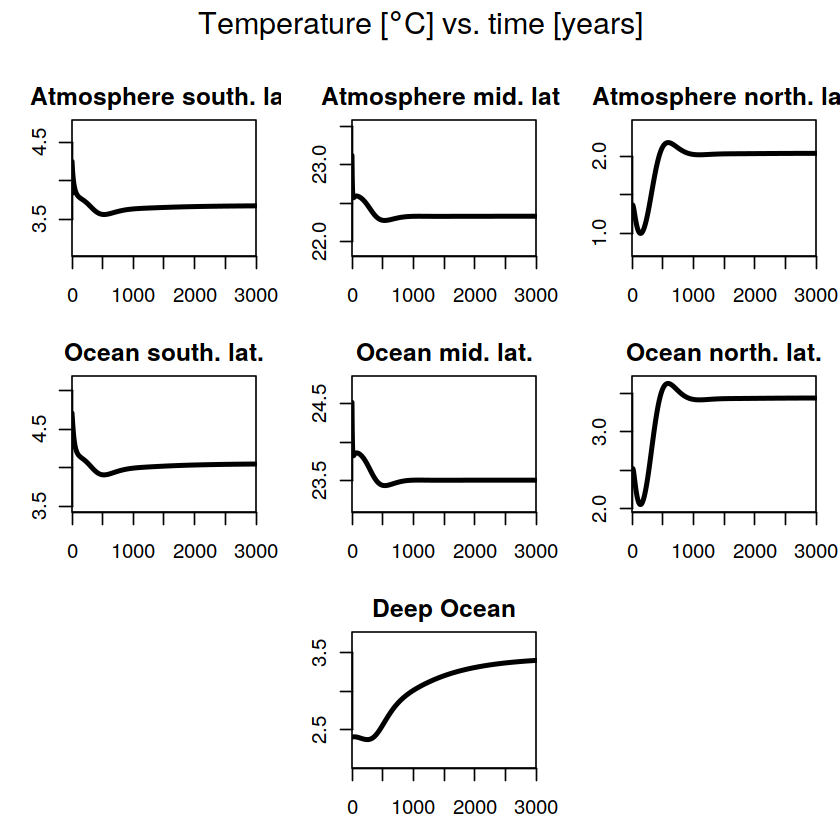

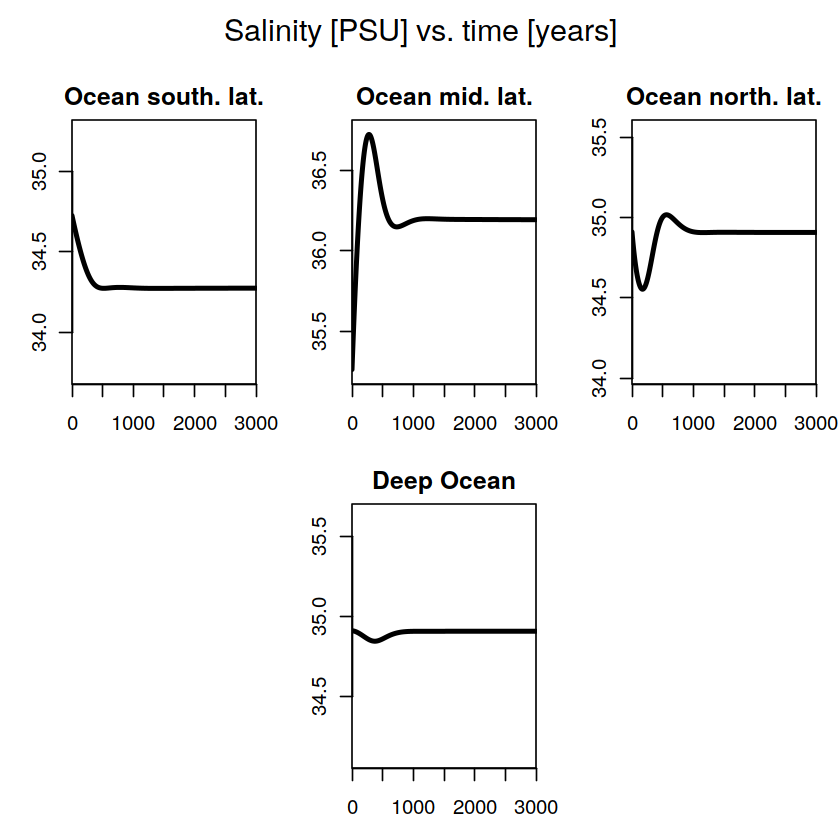

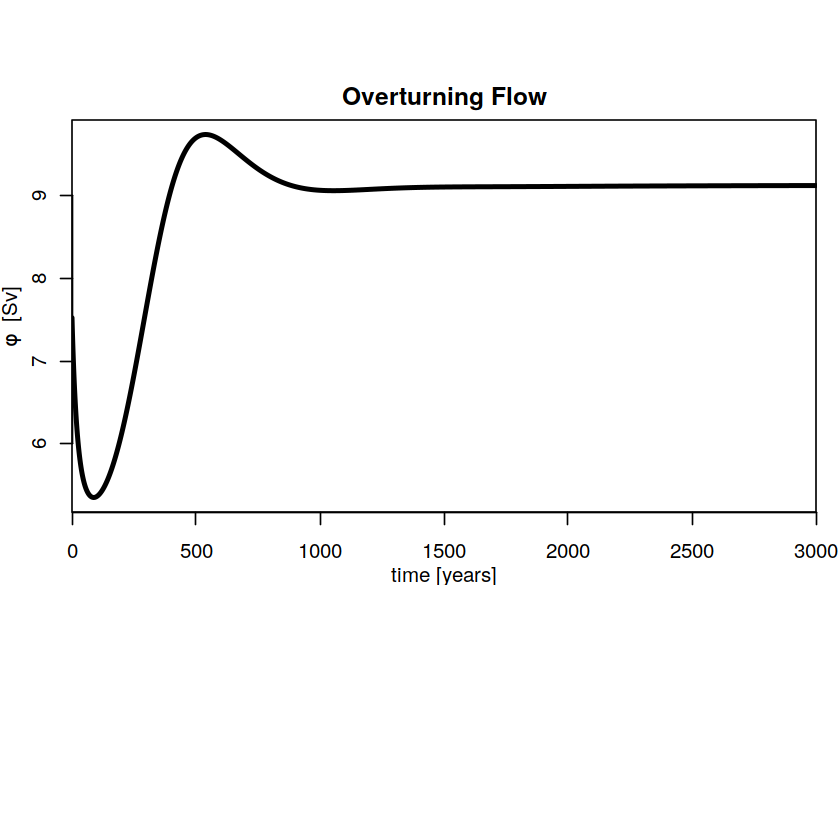

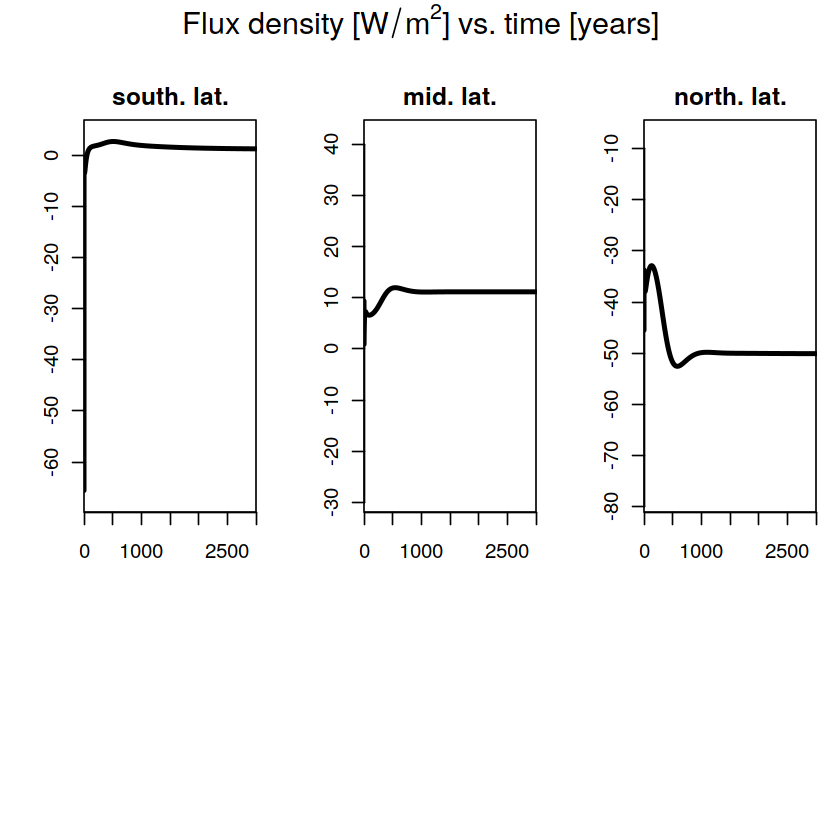

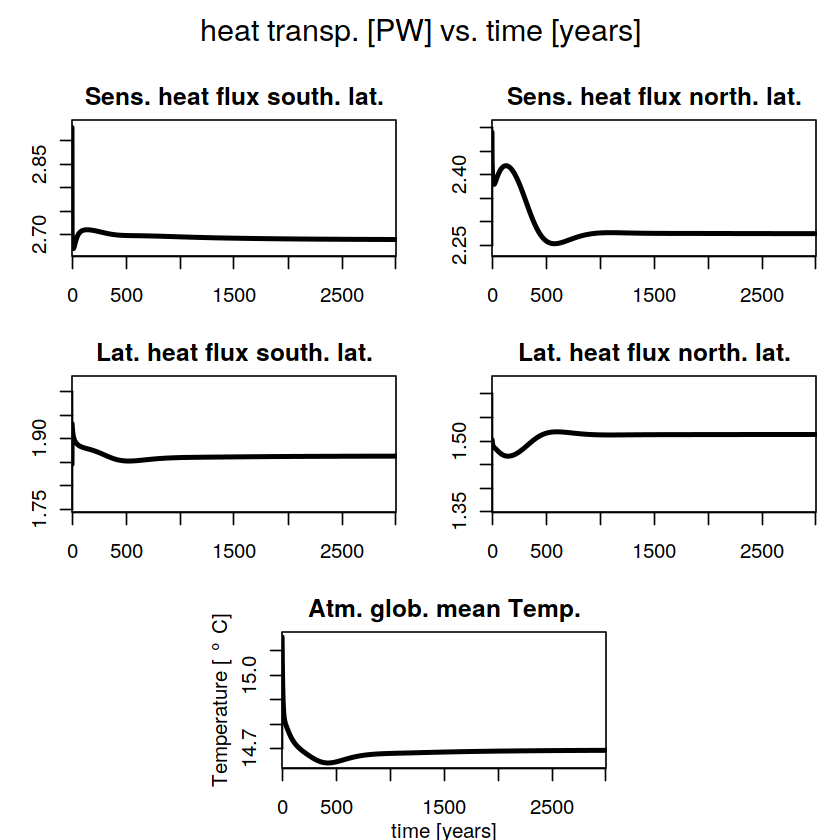

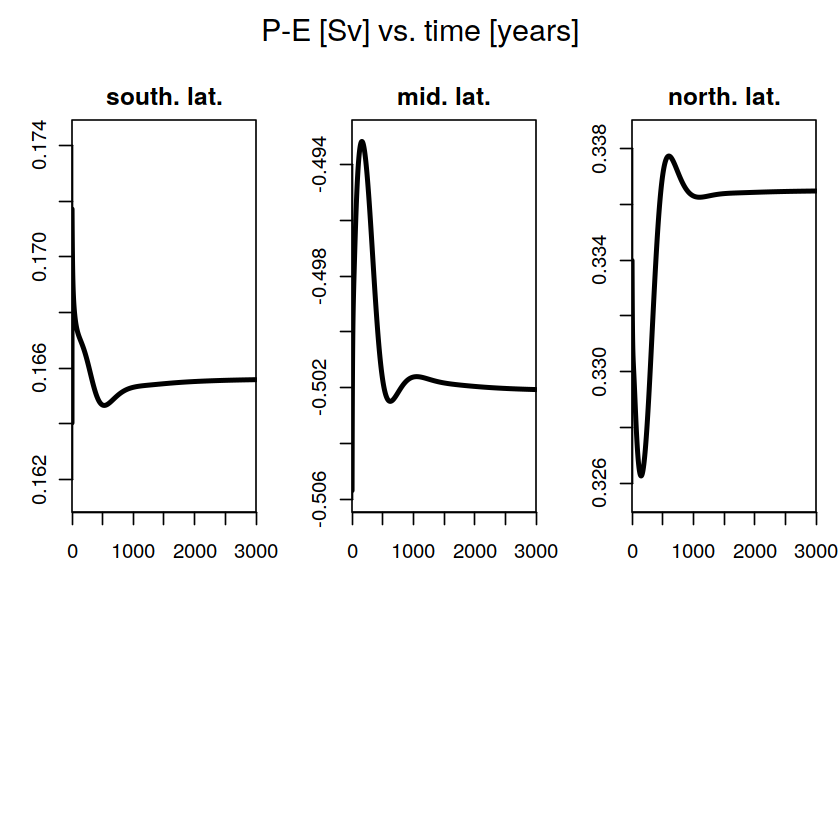

In [55]:
#Visuaize Spinup results
plot_box_Temp(Spinup)

plot_box_Sal(Spinup)

plot_box_Flux(Spinup)

plot_box_SurfHeatFlux(Spinup)

plot_box_AtmHeatTransp(Spinup)

plot_box_PE(Spinup)



# Simulation

## Running the sevenbox model
The simulation parameters stay the same as in the spinup.
We have to define the simualtion length in years and can specify a salinity perturbation (in PSU) at one of the North, Mid, South or deep box.

In [61]:
flag='S'              # Set flag=S,M,N,D to perturb resp. the south, middle lat, north, deep box
perturbation=c(0, 0.1, -0.1)   # Set perturbations (in PSU). Multiple perturbations can be defined (e.g. c(0, 0.1, 0.5) )
N=1000                # Set simulation length in years


#Get initial conditions from Spinup run
max_idx = length(Spinup$time)

InitialCond=list(Tasl = Spinup$Tasl[max_idx],
                 Taml = Spinup$Taml[max_idx],
                 Tanl = Spinup$Tanl[max_idx],
                 Tsl  = Spinup$Tsl[max_idx],
                 Tml  = Spinup$Tml[max_idx],
                 Tnl  = Spinup$Tnl[max_idx],
                 Td   = Spinup$Td[max_idx],
                 Ssl  = Spinup$Ssl[max_idx],
                 Sml  = Spinup$Sml[max_idx],
                 Snl  = Spinup$Snl[max_idx],
                 Sd   = Spinup$Sd[max_idx])


#Run experiment
Results = sevenbox(flag=flag,
                   perturbation=perturbation,
                   N=N, 
                   cpo=cpo, 
                   Ks=Ks, 
                   Kl=Kl, 
                   CFnl=CFnl, 
                   CFml=CFml, 
                   CFsl=CFsl, 
                   F3=F3, 
                   F4=F4,
                   Initial=InitialCond)


 Progress: Perturbation 3 of 3: 100%

## View Results

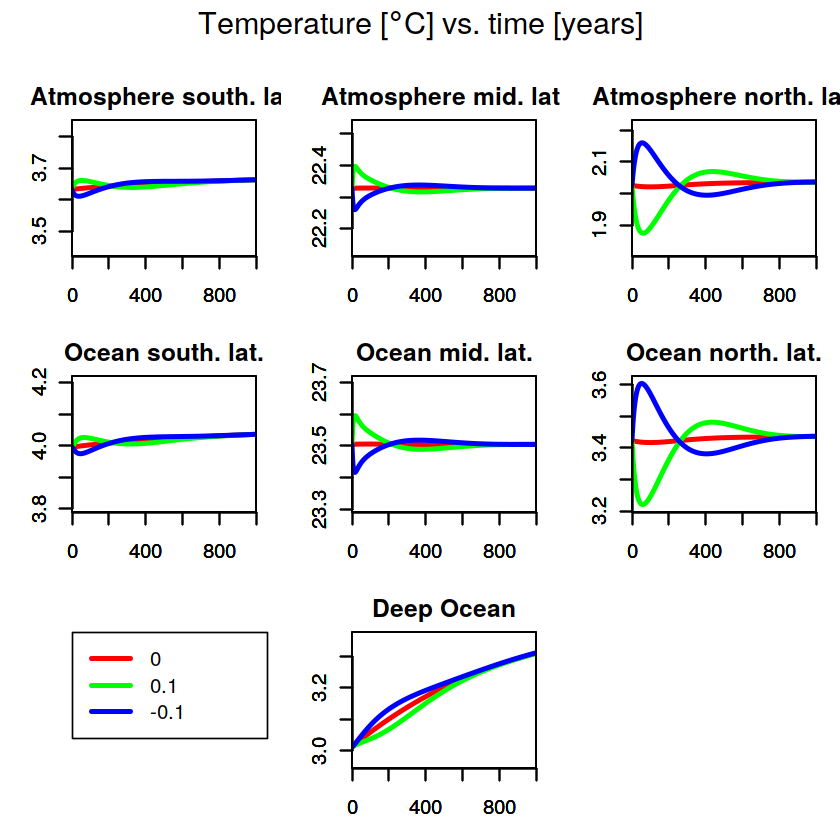

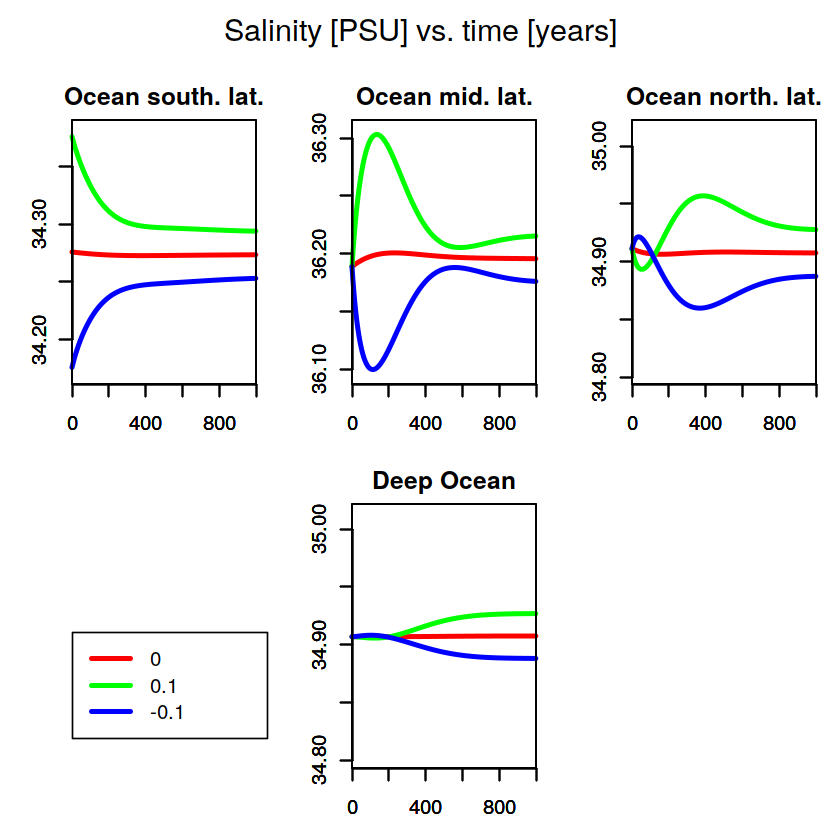

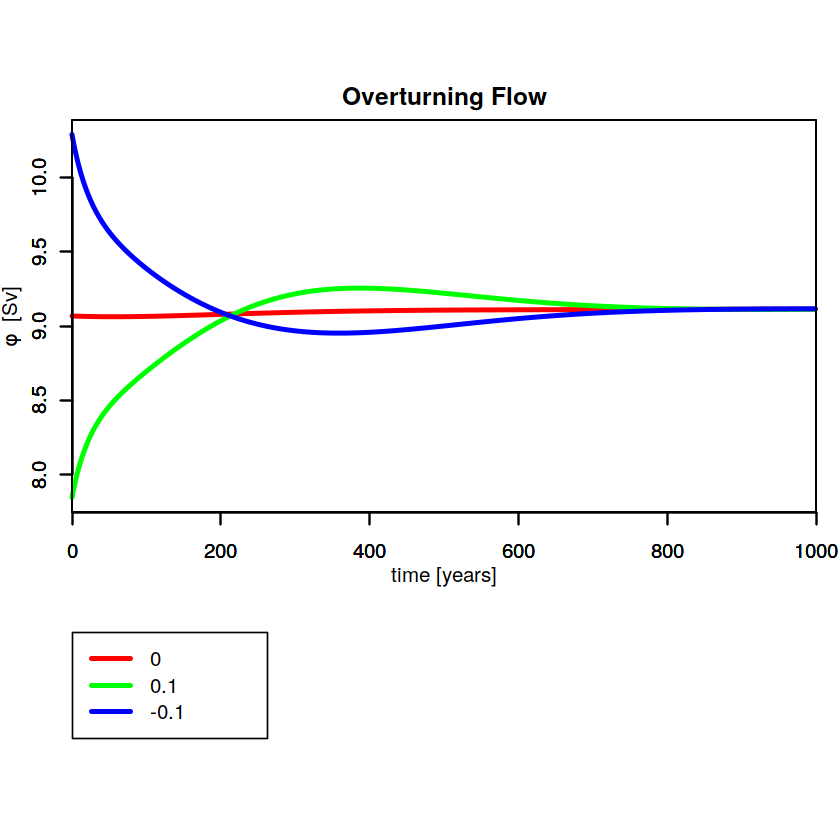

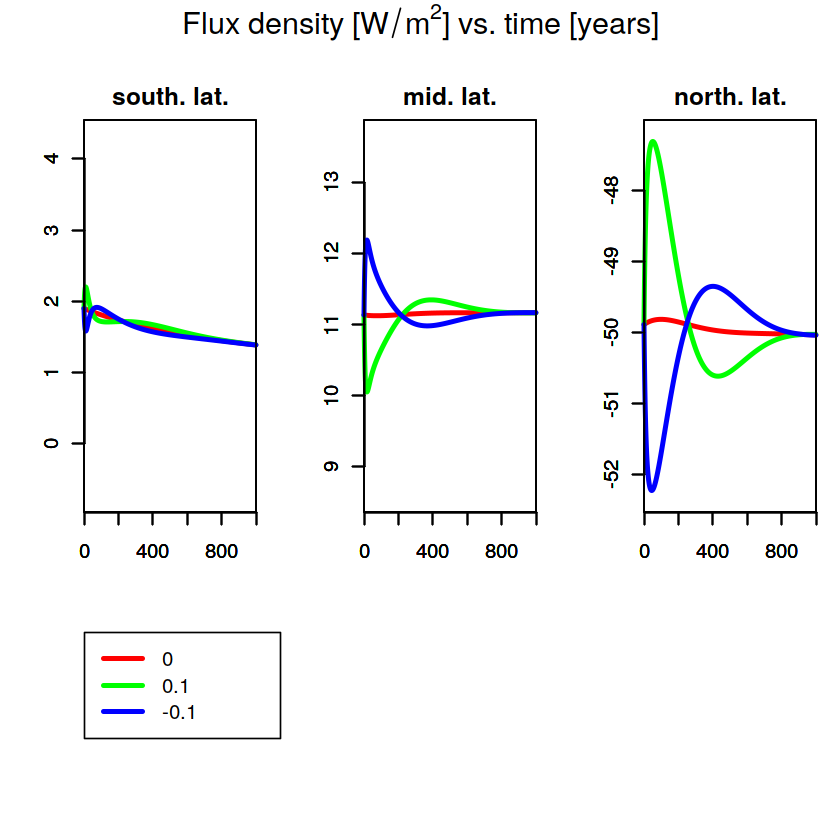

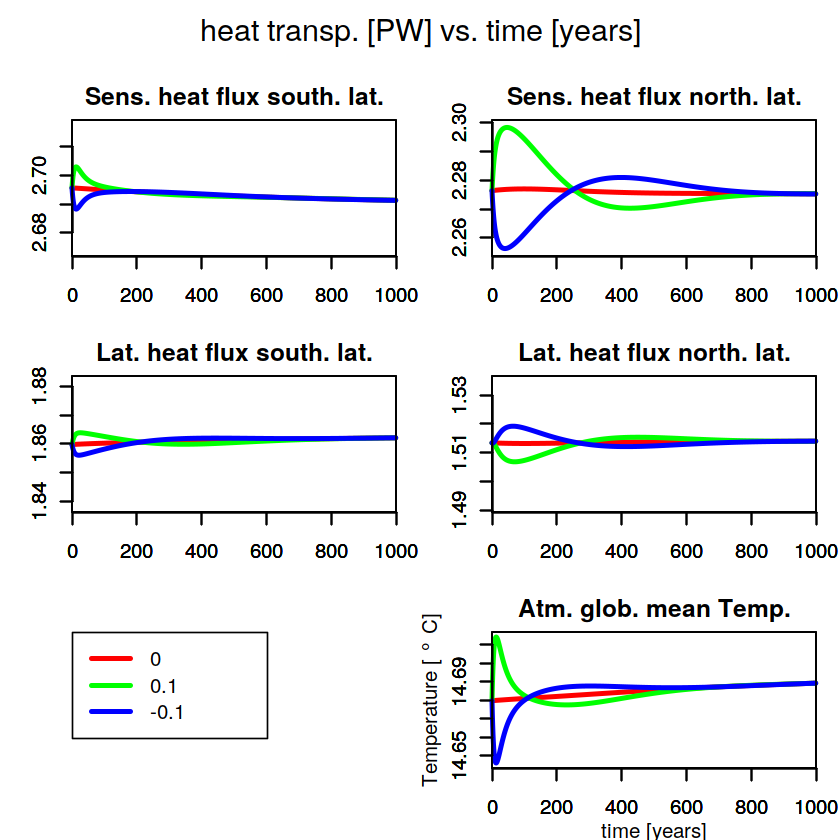

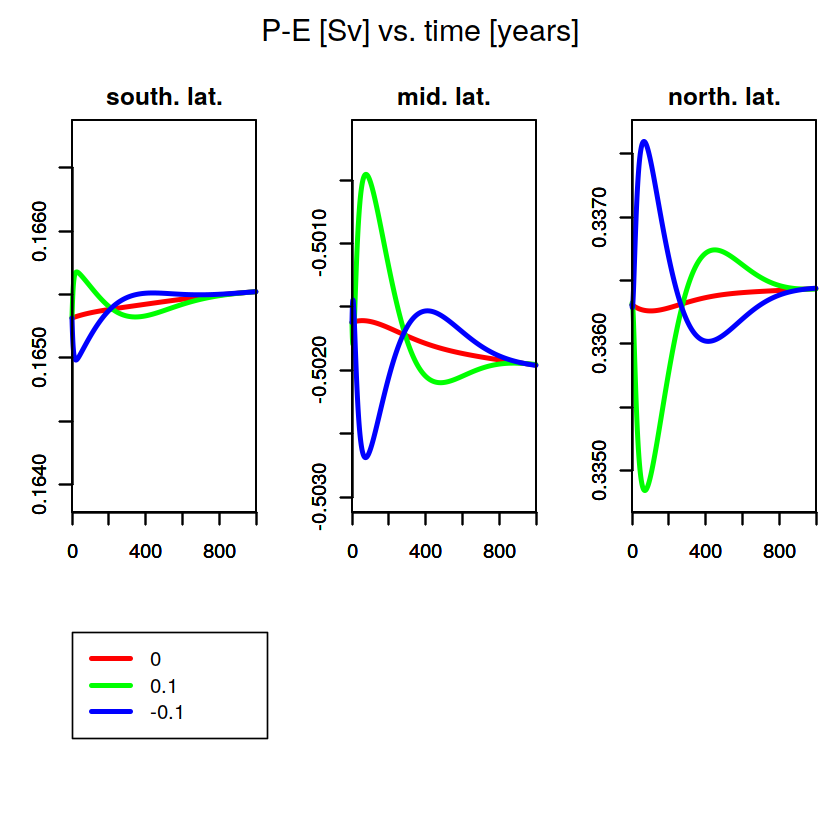

In [62]:
#Visualize Results
plot_box_Temp(Results, pert = perturbation)

plot_box_Sal(Results, pert = perturbation)

plot_box_Flux(Results, pert = perturbation)

plot_box_SurfHeatFlux(Results, pert = perturbation)

plot_box_AtmHeatTransp(Results, pert = perturbation)

plot_box_PE(Results, pert = perturbation)